In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
churn_df=pd.read_csv("Churn_Modelling.csv")

In [4]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
type(churn_df)

pandas.core.frame.DataFrame

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
churn_df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [11]:
label_encoder=LabelEncoder()
churn_df["Gender"]=label_encoder.fit_transform(churn_df["Gender"])

In [12]:
churn_df=pd.get_dummies(churn_df,columns=["Geography"],drop_first=True)

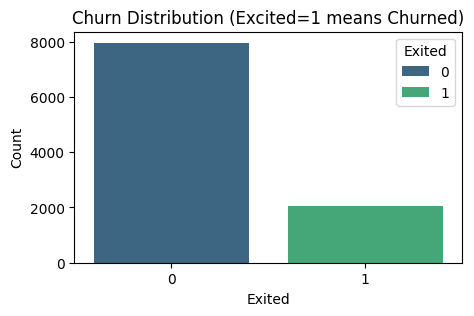

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(x="Exited",data=churn_df,hue="Exited",palette="viridis")
plt.title("Churn Distribution (Excited=1 means Churned)")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

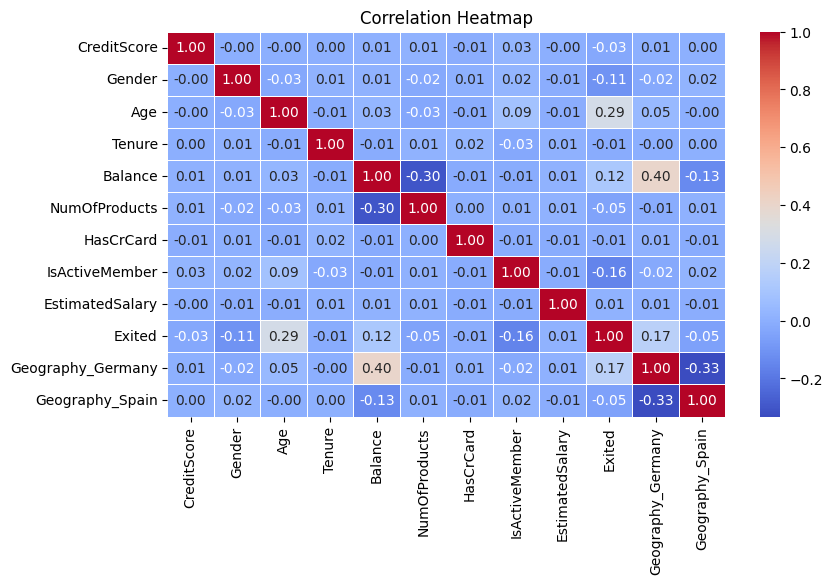

In [14]:
plt.figure(figsize=(9,5))
sns.heatmap(churn_df.corr(),annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

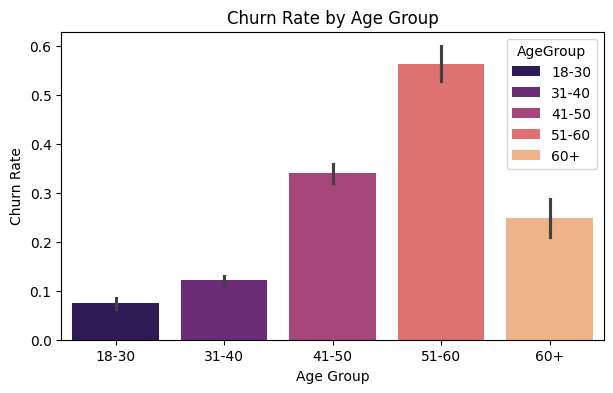

In [15]:
churn_df["AgeGroup"]=pd.cut(churn_df["Age"],bins=[18,30,40,50,60,100],labels=["18-30","31-40","41-50","51-60","60+"])
plt.figure(figsize=(7,4))
sns.barplot(x=churn_df["AgeGroup"],y=churn_df["Exited"],hue=churn_df["AgeGroup"],palette="magma")
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.show()

In [16]:
churn_df.drop(columns=["AgeGroup"],inplace=True)

In [17]:
X=churn_df.drop(columns=["Exited"])
y=churn_df["Exited"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [23]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("\n")

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76     

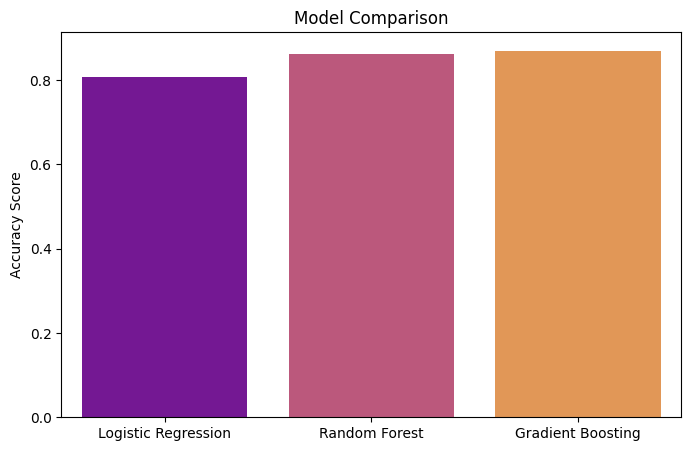

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()),hue=list(results.keys()), palette="plasma",legend=False)
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.show()

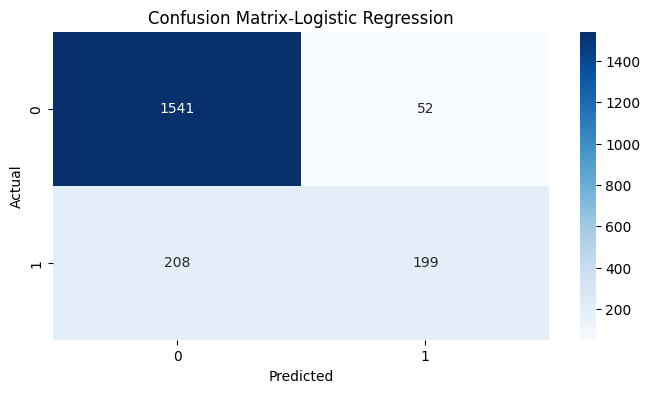

In [26]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix-Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Random Forest**

In [27]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

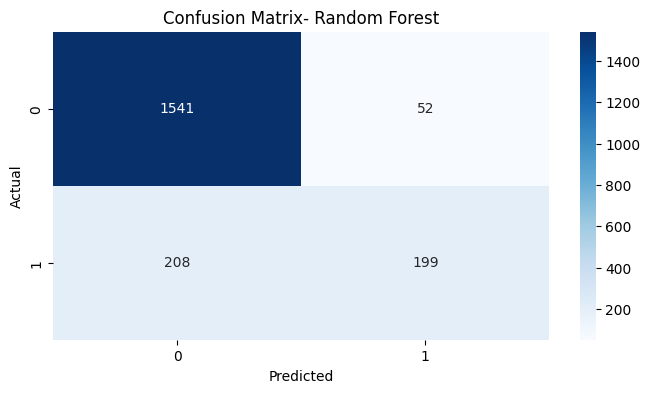

In [28]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix- Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
feature_importances=pd.Series(rf_model.feature_importances_,index=X.columns)
feature_importances=feature_importances.sort_values(ascending=False)

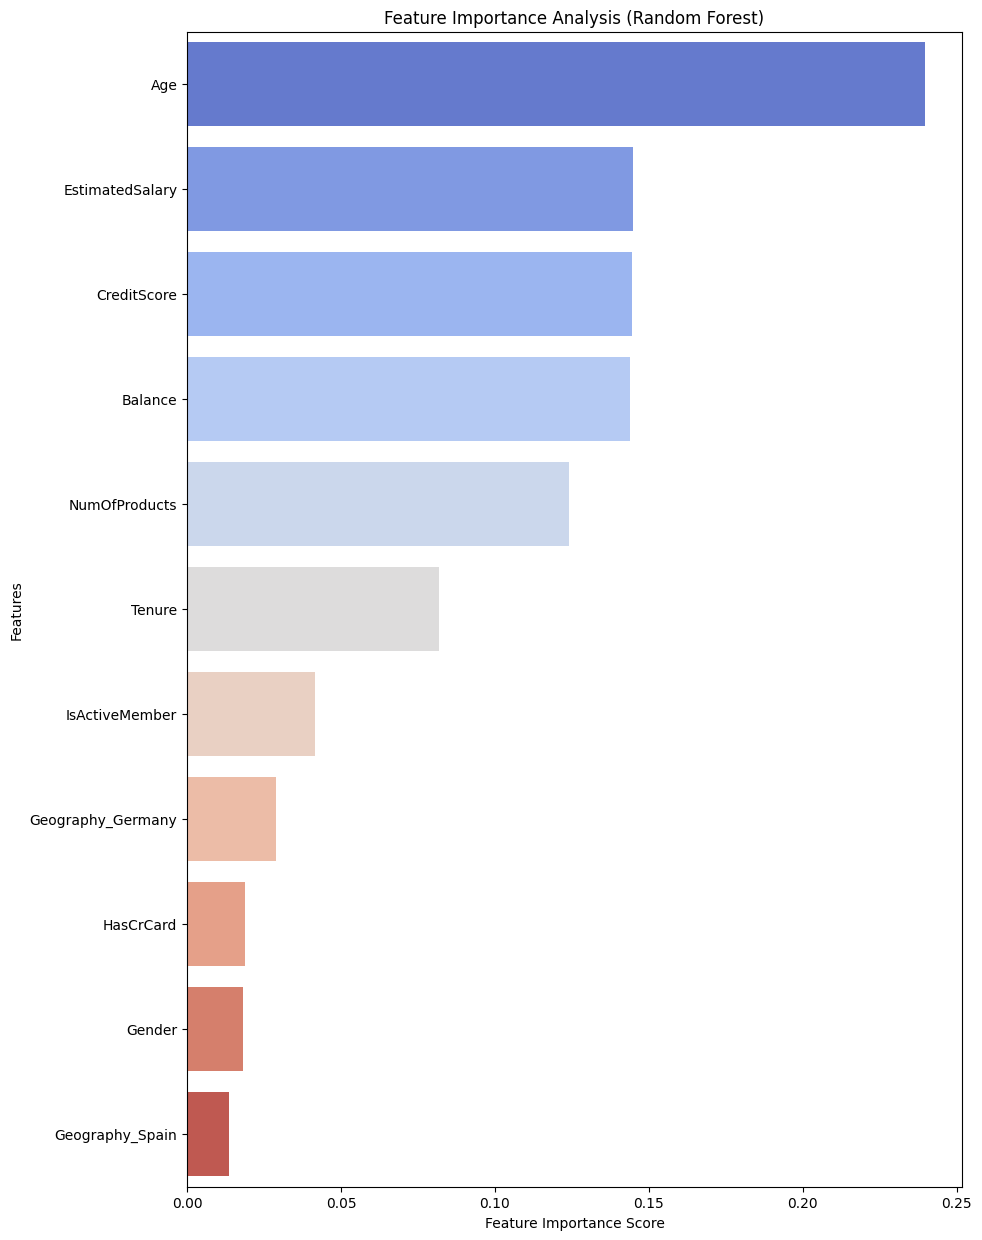

In [31]:
plt.figure(figsize=(10,15))
sns.barplot(x=feature_importances,y=feature_importances.index,hue=feature_importances.index,palette="coolwarm",legend=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Analysis (Random Forest)")
plt.show()

# **Gradient Boosting**

In [32]:
best_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

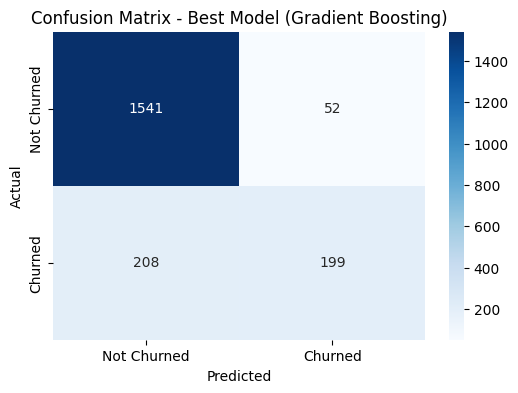

In [33]:
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model (Gradient Boosting)")
plt.show()